In [1]:
from common import *

In [2]:
df_apb_fingerprint = pd.read_csv("./data/filtered/apb/Pixel9.csv")
df_apb_eval = pd.read_csv("./data/filtered/apb/Pixel9_eval.csv")

df_flat_fingerprint = pd.read_csv("./data/filtered/flat/Pixel9.csv")
df_flat_eval = pd.read_csv("./data/filtered/flat/Pixel9_eval.csv")

In [3]:
def prep_data(df):
    # Merge coordinates into single columns
    df["anchor_position"] = list(zip(df["anchor_position_x"], df["anchor_position_y"]))
    df["target_position"] = list(zip(df["target_position_x"], df["target_position_y"]))

    # Round the coordinates in the anchor_position and target_position columns
    df["anchor_position"] = df["anchor_position"].apply(lambda pos: (round(pos[0]), round(pos[1])))
    df["target_position"] = df["target_position"].apply(lambda pos: (round(pos[0]), round(pos[1])))

    # Drop the original coordinate columns if no longer needed
    df.drop(columns=["anchor_position_x", "anchor_position_y", "target_position_x", "target_position_y"], inplace=True)

    # Group by monitor_mac and target_position, and calculate the median RSSI
    df_median_rssi = (
        df.groupby(["target_position", "target_mac", "monitor_mac", "anchor_position"], as_index=False)
        .agg({"rssi": "median"})
    )

    return df_median_rssi

In [4]:
df_apb_prep_fingerprint = prep_data(df_apb_fingerprint)
df_apb_prep_eval = prep_data(df_apb_eval)

df_flat_prep_fingerprint = prep_data(df_flat_fingerprint)
df_flat_prep_eval = prep_data(df_flat_eval)

In [5]:
anchor_positions_esp8266_apb = filter_esp8266(df_apb_prep_fingerprint)["anchor_position"].unique()
anchor_positions_esp32_apb = filter_esp32(df_apb_prep_fingerprint)["anchor_position"].unique()
fingerprint_positions_apb = df_apb_prep_fingerprint["target_position"].unique()
eval_positions_apb = df_apb_prep_eval["target_position"].unique()

anchor_positions_esp8266_flat = filter_esp8266(df_flat_prep_fingerprint)["anchor_position"].unique()
anchor_positions_esp32_flat = filter_esp32(df_flat_prep_fingerprint)["anchor_position"].unique()
fingerprint_positions_flat = df_flat_prep_fingerprint["target_position"].unique()
eval_positions_flat = df_flat_prep_eval["target_position"].unique()

In [12]:
import matplotlib.pyplot as plt

def plot_overview(anchor_positions_esp8266, anchor_positions_esp32, fingerprint_positions, eval_positions, bg_filepath):
    img = plt.imread(bg_filepath)

    height = 8
    width = height / img.shape[0] * img.shape[1]
    fig, ax = plt.subplots(figsize=(width, height))

    ax.imshow(img, aspect='auto', alpha=1.0)
    
    anchor_double_positions = list(set(anchor_positions_esp8266) & set(anchor_positions_esp32))
    anchor_double_x, anchor_double_y = zip(*anchor_double_positions)
    ax.scatter(anchor_double_x, anchor_double_y, color='red', edgecolors='black', linewidths=2, label='Anchor (ESP8266 & ESP32)')
    
    anchor_single_positions = list(set(anchor_positions_esp32) - set(anchor_double_positions))
    anchor_single_x, anchor_single_y = zip(*anchor_single_positions)
    ax.scatter(anchor_single_x, anchor_single_y, color='red', label='Anchor (only ESP32)')

    fingerprint_x, fingerprint_y = zip(*fingerprint_positions)
    ax.scatter(fingerprint_x, fingerprint_y, color='blue', s=20, marker='x', label='Fingerprint')

    eval_x, eval_y = zip(*eval_positions)
    ax.scatter(eval_x, eval_y, color='green', s=20, marker='^', label='Eval')

    ax.grid(which='major', alpha=0.5)
    ax.grid(which='minor', alpha=0.2)
    ax.legend()
    ax.set_xlabel('X Coordinate (cm)')
    ax.set_ylabel('Y Coordinate (cm)')
    ax.axis('equal')
    plt.show()

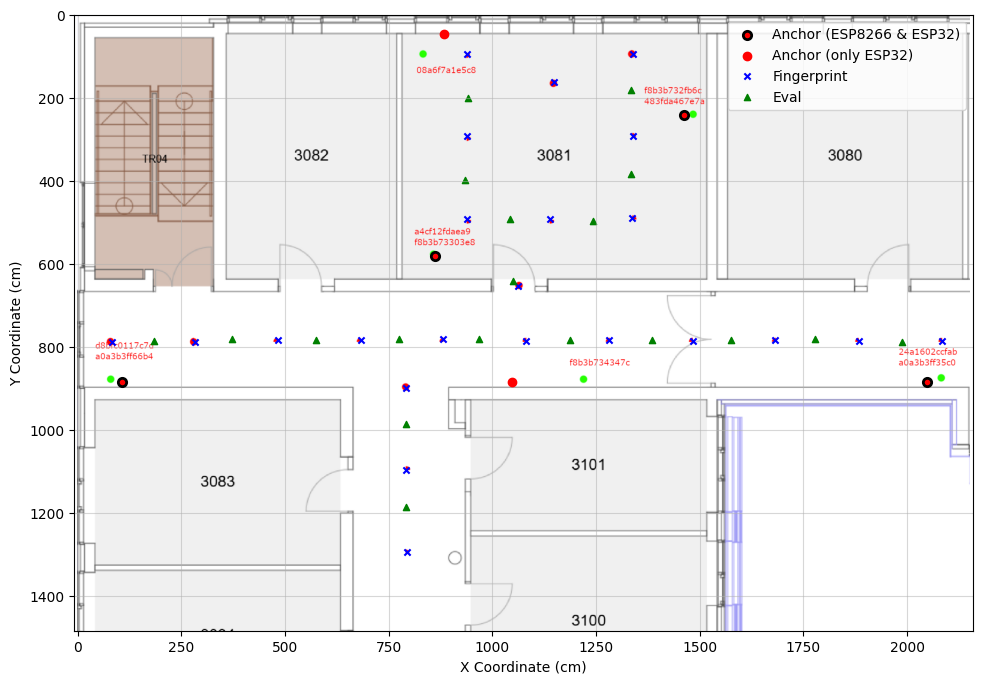

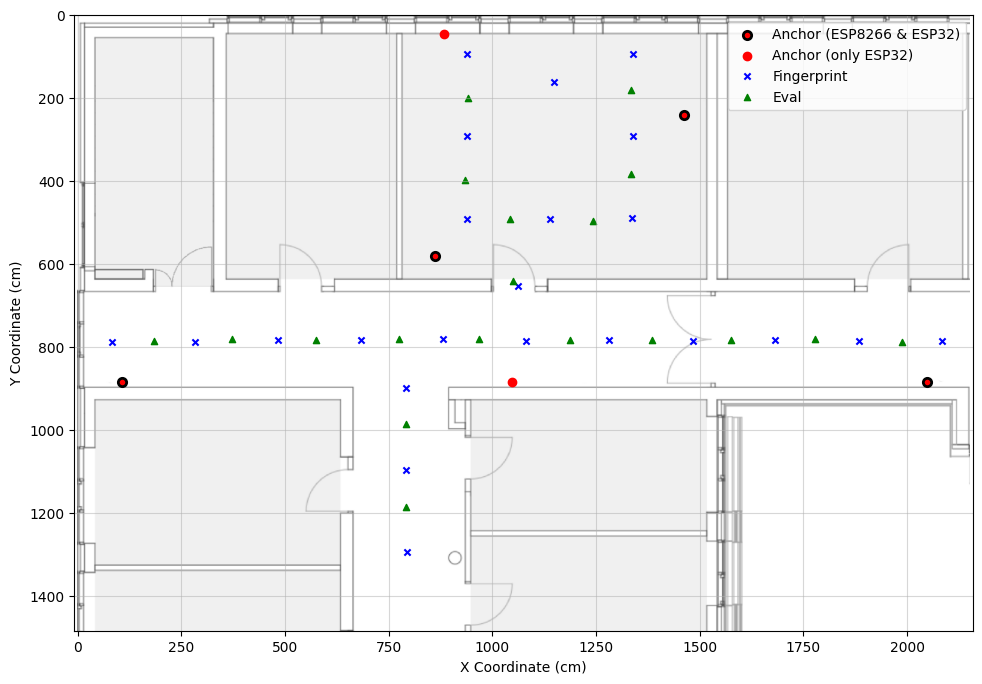

In [13]:
plot_overview(anchor_positions_esp8266_apb, anchor_positions_esp32_apb, fingerprint_positions_apb, eval_positions_apb, './images/apb_3081_scaled_fingerprints.png')
plot_overview(anchor_positions_esp8266_apb, anchor_positions_esp32_apb, fingerprint_positions_apb, eval_positions_apb, './images/apb_normalized.png')

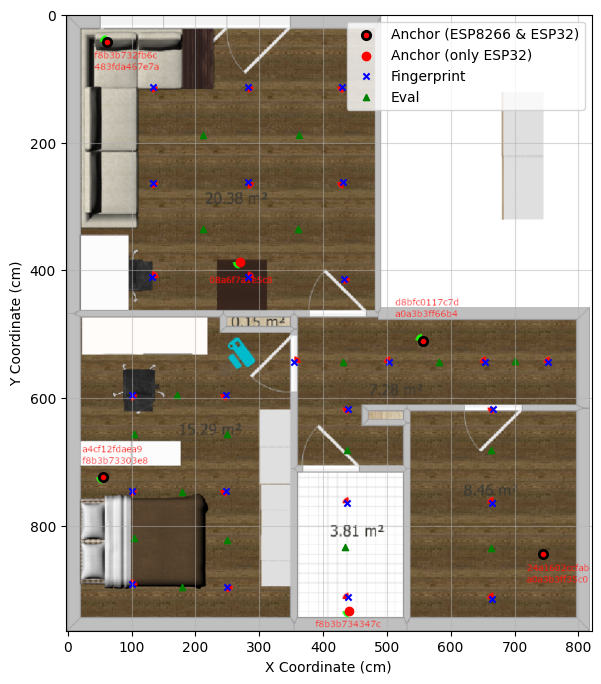

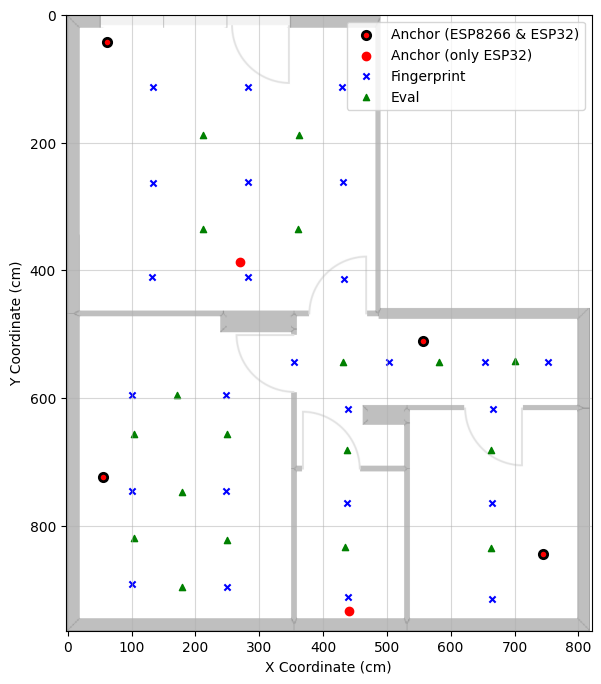

In [14]:
plot_overview(anchor_positions_esp8266_flat, anchor_positions_esp32_flat, fingerprint_positions_flat, eval_positions_flat, './images/flat_scaled_fingerprints.png')
plot_overview(anchor_positions_esp8266_flat, anchor_positions_esp32_flat, fingerprint_positions_flat, eval_positions_flat, './images/flat_normalized.png')